# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you  implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [ ]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats
import pandas as pd
import numpy as np

In [ ]:
COLORBLIND_PALETTE = True

In [ ]:
# Plotting constants
TITLE_FONTSIZE = 20
LABEL_FONTSIZE = 12
palette = 'tab10' if COLORBLIND_PALETTE == False else 'colorblind'
CMAP  = sns.color_palette(palette)
COLOR_BASELINE, COLOR_UPDATE = CMAP[0:2]
COLOR_TOP, COLOR_BOTTOM = CMAP[2:4]
COLOR_ARIAL, COLOR_HELVETICA = CMAP[4:6]
COLOR_NEUTRAL = CMAP[7]

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [ ]:
DATA_FOLDER = './data/'
data_raw = pd.read_csv(DATA_FOLDER+'data.tsv.gz', sep='\t', error_bad_lines=False)

b'Skipping line 2142: expected 11 fields, saw 27\n'


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter these rows from the data (always keeping the first).
2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). Also, the number of odometer readings for each contract should be the same as the number stated in the `motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.
3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? Visualize the distribution of the data and remove any extreme outliers.
4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

#### 2.1: Drop duplicate rows

In [ ]:
# Drop rows with the same policy identifier, keeping only the first in case of duplicates
len_data_with_duplicates = data_raw.shape[0]
data = data_raw.drop_duplicates(subset='id', keep='first')
len_data_without_duplicates = data.shape[0]
print('Removed %d duplicates from the data.'%(len_data_with_duplicates - len_data_without_duplicates))

data.set_index('id', inplace=True)
data.tail()

Removed 9 duplicates from the data.


,condition,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
id,,,,,,,,,,
13484,Sign Top,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13485,Sign Top,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13486,Sign Bottom,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13487,Sign Top,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1
13488,Sign Top,22930,37888,NaN,NaN,NaN,NaN,NaN,NaN,1


**Table 1: the last 5 rows of the dataset.**

We can also notice that at least one policy (row 13485) has a contract for only motorcycle1 and motorcycle4, skipping the numbers in the middle (motorcycle2 and motorcycle3). Despite this inconsistency, we keep the data as this is not a serious enough reason to believe its invalid.

#### 2.2: Clean data
- Check whether the number of motorcycles recorded in baseline contracts equals the number of motorcycles in updated contracts;
- Check whether the number of odometer readings for each contract is the same as the number stated in the ```motorcycle_count``` variable.

In [ ]:
# Utility
baseline_columns = ['baseline_motorcycle1', 'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']
update_columns = ['update_motorcycle1', 'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']
km_columns = baseline_columns + update_columns

In [ ]:
# Check if NaNs in the baseline columns are at the same locations as NaNs in the update columns.
# Use .set_axis([1,2,3,4],axis=1) to make the column names of both boolean dataframes the same.
is_baseline_value = data[baseline_columns].notna().set_axis([1,2,3,4],axis=1)
is_update_value = data[update_columns].notna().set_axis([1,2,3,4],axis=1)
is_valid = (is_baseline_value == is_update_value).all(axis=1)

In [ ]:
# Check if the number of baseline ordometer readings equals motorcyle_count.
# No need to check updated readings, since the number of motorcycles are the same for baseline and update (we checked in the cell above).
num_baseline_readings = data[baseline_columns].notnull().sum(axis=1)
is_valid = (is_valid & (num_baseline_readings == data['motorcycle_count']))

In [ ]:
# Remove invalid data
data = data[is_valid]
print('Removed %d invalid rows from the data.'%(~is_valid).sum())

Removed 0 invalid rows from the data.


Both conditions were already satisfied: each baseline contract has a corresponding updated contract, and the number of reported odometer readings per contract is the same as the number of motorcycles reported.

#### 2.3: Check for outliers
First, we will do a quick check for outliers with a description of the data.

In [ ]:
data[km_columns].describe()

,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
count,1.348800e+04,5.648000e+03,1277.000000,326.000000,1.348800e+04,5.648000e+03,1277.000000,326.000000
mean,7.413998e+14,6.732597e+04,67657.320282,67827.975460,7.413998e+14,9.227763e+04,92849.408771,93374.279141
std,8.610457e+16,6.022646e+04,64419.001860,54610.217241,8.610457e+16,6.188369e+04,66547.920222,56345.386070
min,0.000000e+00,0.000000e+00,0.000000,0.000000,4.200000e+01,1.160000e+02,155.000000,622.000000
25%,2.528125e+04,2.449825e+04,18500.000000,14284.750000,5.009600e+04,4.988875e+04,43872.000000,41525.500000
50%,5.634150e+04,5.615750e+04,58821.000000,68181.000000,8.239750e+04,8.206100e+04,85645.000000,93387.500000
75%,9.625925e+04,9.700000e+04,100000.000000,106882.000000,1.233340e+05,1.221915e+05,128037.000000,128940.500000
max,1.000000e+19,1.000581e+06,884594.000000,217715.000000,1.000000e+19,1.030915e+06,931105.000000,244658.000000


**Table 2: a summary of the odometer readings statistics.**  
Clearly, there are extreme outliers in the columns```baseline_motorcycle1``` and ```update_motorcycle1```: their max value is $10^{19} km$ which is unrealistically high. To inspect whether there are more of these outlier values, we visualize the kilometrages in the raw dataset as a boxplot. 

In [ ]:
def plot_horizontal_boxplot_with_datapoint_counts(data, x_pos, ax, palette):
    '''
    This function makes a boxplot for each column in 'data'.
    Additionally, it shows the number of datapoints (N) in each column.
    x_pos is the position along the x-axis where N should be plotted. 
    '''
    sns.boxplot(data=data[km_columns], orient="h", palette=palette, whis=3, ax=ax)
    # Write the number of not-nan datapoints for each column on the right side of the plot
    counts = data.count()
    for y_pos,count in enumerate(counts):
        ax.text(x_pos,
                y_pos,
                'N = '+str(count),
                verticalalignment='center',
                fontsize='small',
                color='k')

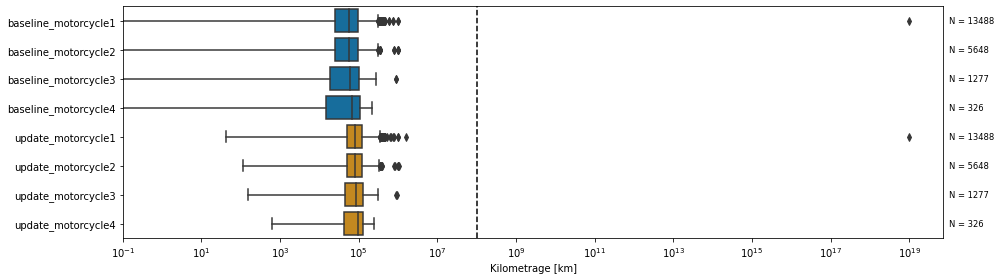

In [ ]:
palette = 4*[COLOR_BASELINE] + 4*[COLOR_UPDATE]
count_x_position = 1e20 # x-location where to plot the number of datapoints ('N=#')
fig, ax = plt.subplots(figsize=(14,4))
plot_horizontal_boxplot_with_datapoint_counts(data[km_columns], count_x_position, ax, palette)
ax.set_xscale('log')
ax.set_xlim(left=1e-1)
ax.set_xticks(np.logspace(-1,19,11))
ax.set_xlabel('Kilometrage [km]')
plt.axvline(1e8, linestyle='--', color='k')
plt.tight_layout()
plt.show()

**Figure 1: Boxplot of raw kilometrage data.**  
The boundaries of each coloured box are the first and the third quartile, and the line in the center represents the median. The whiskers have a length of three times the interquartile range, and datapoints above the whiskers are marked as outliers. In this context, though, we are only interested in very extreme outliers, so we will not remove all of them. The dashed vertical line represents instead the outlier threshold of $10^{8} km$ (see below for a justification of this number). Because the left-hand whiskers of the first 4 boxplots (corresponding to 'baseline') are 0, their ends are undefined on the logarithmic x-axis.

The outlier values of $10^{19} km$ present in the baseline and update columns of motorcycle 1 are clearly visible, and we oserve that no other datapoints are present between $10^8 km$ and $10^{19} km$. We think a kilometrage of $10^{8} km$, i.e. 100,000,000 km, is a reasonable maximum odometer value, as it corresponds corresponds to driving a motorcycle continuously for 24 hours per day each day for 30 years at an average speed of 80 km/h. Therefore, we will now remove all extreme values above $10^{8} km$.

In [ ]:
# Remove extreme outliers with a threshold
extreme_limit = 1e7
is_extreme = (data[km_columns] > extreme_limit).any(axis=1)
data = data[~is_extreme]
print('Removed %d rows with extreme values from the data.'%is_extreme.sum())

Removed 2 rows with extreme values from the data.


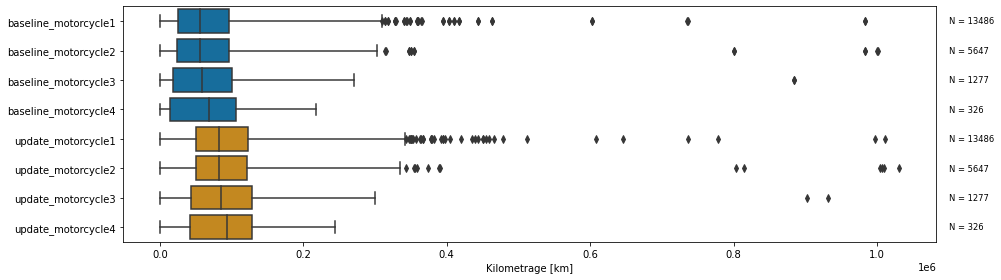

In [ ]:
count_x_position = 1.1e6 # x-location where to plot the number of datapoints ('N=#')
fig, ax = plt.subplots(figsize=(14,4))
plot_horizontal_boxplot_with_datapoint_counts(data[km_columns], count_x_position, ax, palette)
ax.set_xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

**Figure 2: Boxplot of kilometrage data with outliers removed.**  
The boundaries of each coloured box are the first and the third quartile, and the line in the center represents the median. Datapoints with values above the whiskers - which have a length of three times the interquartile range - are marked as diamonds.  

In this boxplot of the cleaned dataset, the first, second and third quartiles of the updated motorcycles are consisistently higher than their corresponding baseline values. This makes sense, since the total distance a motorcycle traveled can only increase. Further, the majority of the kilometrages are reported for motorcycle 1 (13486 datapoints for motorcycle 1 versus 7250 for motorcycles 2-4).

#### 2.4 In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing numerical data with outliers with the mean or the median? Why?  

We would use **median** because outliers are less likely to impact the median than the mean. The median is a robust statistic, because it is only affected by the order of the datapoints and not by their values. Therefore, the median is unaffected by how far the outlier lies from the rest of the data, while the mean is strongly affected by that.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These  should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy **or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

#### 3.1 Calculate the average kilometrage across the insured motorcycles

In [ ]:
data['baseline_average'] = data[baseline_columns].mean(axis=1)
data['update_average'] = data[update_columns].mean(axis=1)
data['diff_average'] = data['update_average'] - data['baseline_average']

In [ ]:
data[['baseline_average', 'update_average', 'diff_average']].describe()

,baseline_average,update_average,diff_average
count,13486.000000,1.348600e+04,13486.000000
mean,67267.584699,9.216698e+04,24899.395392
std,50685.506907,5.221286e+04,12495.931401
min,0.000000,1.250000e+02,24.000000
25%,31090.375000,5.591988e+04,15525.250000
50%,59717.500000,8.464600e+04,24939.333333
75%,92238.250000,1.190441e+05,34416.750000
max,983155.000000,1.010893e+06,49997.000000


**Table 3: a summary of the statistics related to the averages of pooled motorcycles.**  

#### 3.2. **Discuss**: Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in the study (sign at the top vs. sign at the bottom).

We could use **max** instead of the mean, which has potential advantages and disadvatanges that we will discuss below. However, we want to start this discussion by our conclusion, namely that based on the analysis of this particular dataset, **using the mean seems the best option**.

Seemingly, there are intuitive reasons for why using **max** could be a good idea, in a hypothetical scenario. However, it turns out that in our case **these ideas are not supported by actual data**.

In particular, it would seem reasonable to assume that many people who own multiple motorcycles have at least one motorcycle that is barely used at all. They are unlikely to cheat on such motorcycles, because there is not much to gain by cheating. However, these unused motorcycles will be included in the mean and will thus drag it down and drag down the difference between cheaters and non-cheaters.
Conversely, this people would tend to use one single motorcycle more than the others and would be motivated to cheat more on it as the potential pay-off is greater. Using the max would thus eliminate the mitigation of unused motorcycles and preserve cheating-originated differences, putting more in evidence the dishonesty we want to study. 

A potential disadvantage of this approach, common also to the mean, would be that people with more motorcycles might instead use them equally (which is the case for our data), while a person with a single motorcycle will use only one. Hence, the person with a single motorcycle might have a higher kilometrage difference than the one relative to the max motorcycle of a person with multiple motorcycles, since their traveled kilometers in a year would be distributed among multiple vehicles. This could introduce a distortion into our data where the average difference of a policy would be affected by its number of motorcycles.

Nonetheless, looking at the data, we can see that **both the advantages and the disadvantage are disproved** in our study. It is in fact true that people with multiples motorcycles do not tend to use one motorcycle much more than the others, as can be seen from **Figure 3**. At the same time, though, **Table 3** shows that vehicles coming from policies with multiple motorcycles share on average the same kilometrage values as vehicles coming from policies with only one motorcycle, so it is not true that the same traveled kilometers tend to be distributed among the different vehicles of a policy. 

In conclusion, in our particular dataset, potential advantages and disadvantages do not seem to be very pronounced, leading us to conclude that both using **max** and **mean** **would lead to a similar effect**, with a slight bias in max as policies with a bigger number of motorcycles will be likely to have larger kilometrages, since having more "choice" in picking the max the probability of obtaining a higher value is higher.

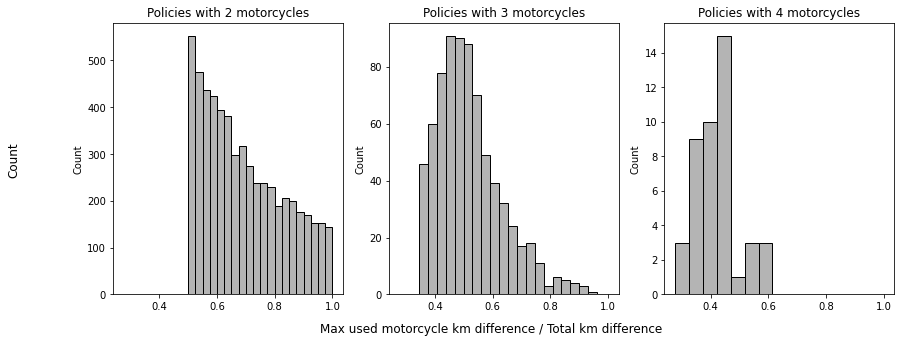

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(14, 5))
for i in range(1, 4):
    data_motor = data[data.motorcycle_count == i+1]
    diffs = data_motor[update_columns].set_axis([1, 2, 3, 4], axis=1) - data_motor[baseline_columns].set_axis([1, 2, 3, 4], axis=1)
    sns.histplot(diffs.max(axis=1) / diffs.sum(axis=1), ax=ax[i-1], alpha=0.7, color=COLOR_NEUTRAL)
    ax[i-1].set_title(f'Policies with {i+1} motorcycles')
 
fig.supxlabel('Max used motorcycle km difference / Total km difference')
fig.supylabel('Count');

**Figure 3: Contribution (ratio) of the most used motorcycle to the total kilometrage difference within a policy.**  
If the distributions plotted here have a large peak near 1, many customers would use one motorcycle significantly more than the other motors. However, the plots show that in the majority of policies with multiple motorcycles there is not a single motorcycle that have a significantly higher usage than the others, for any number of motorcycles. All motorcycles tend thus to be used almost equally, or at least their kilometrages have the same order of magnitude.

In [ ]:
data.groupby('motorcycle_count').diff_average.describe()

,count,mean,std,min,25%,50%,75%,max
motorcycle_count,,,,,,,,
1,7059.0,24748.382490,14382.048007,24.000000,12131.500000,24742.000000,37119.500000,49997.0
2,5648.0,25049.428824,10265.552324,359.500000,17736.625000,25067.750000,32578.625000,49814.5
3,735.0,25204.261224,8136.427999,2981.333333,19317.833333,24865.333333,30676.166667,46307.0
4,44.0,24775.187500,6326.624545,6679.250000,20796.562500,23961.375000,28247.375000,41667.5


**Table 4: Descriptive statistics of average km differences in policies with different number of motorcycles.**  
The table shows means almost equal for each set of policies; hence, the average kilometrage per motorcycle is not affected by the number of motorcycles in the policy it comes from.

#### 3.3 Number of motorcycles insured

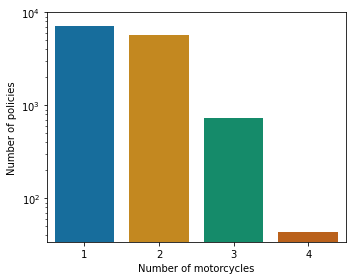

In [ ]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x='motorcycle_count', data=data, palette=CMAP)
plt.yscale('log')
plt.xlabel('Number of motorcycles')
plt.ylabel('Number of policies')
plt.yticks([1e2,1e3,1e4])
plt.tight_layout()
plt.show()

**Figure 4: The number of policies per motorcycle number.**  
The number of policies decreases faster than exponentially with the motorcycle number. The majority of the contracts have either one or 2 motorcycles insured, while only a few contracts have 4 motorcycles.

#### 3.4 Calculate the average of mean kilometrages pooled across motorcycles

In [ ]:
stats_pooled = data['update_average'].agg([np.mean, np.std])
print('Average pooled: %d km\nStd pooled: %d km'%(stats_pooled[0],stats_pooled[1]))

Average pooled: 92166 km
Std pooled: 52212 km


#### 3.5 Calculate the average kilometrage per motorcycle

In [ ]:
data_per_motor = data[data.motorcycle_count == 4][update_columns].melt().value
stats_per_motor = data_per_motor.agg([np.mean, np.std])
print('Average per motor (4 motors only): %d km\nStd per motor (4 motors only): %d km'%(stats_per_motor[0], stats_per_motor[1]))

Average per motor (4 motors only): 113443 km
Std per motor (4 motors only): 83148 km


#### 3.6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy  **or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. How may this decision influence the results of the study?

In [ ]:
stats_pooled = data[data.motorcycle_count == 4]['update_average'].agg([np.mean, np.std])
print('Average pooled (4 motors only): %d km\nStd pooled (4 motors only): %d km'%(stats_pooled[0],stats_pooled[1]))

Average pooled (4 motors only): 113443 km
Std pooled (4 motors only): 52853 km


In [ ]:
data_per_motor = data[update_columns].melt().value
stats_per_motor = data_per_motor.agg([np.mean, np.std])
print('Average per motor: %d km\nStd per motor: %d km'%(stats_per_motor[0], stats_per_motor[1]))

Average per motor: 92328 km
Std per motor: 59958 km


The averages resulting from the two methods are mathematically equivalent on a subset of policies with the same number of motorcycles. In fact, using the *pooled* method (average of averages within policies) only on contracts with 4 insured motorcycles we obtain exactly the same mean of the *per motor* method (average of individual motorcycles) in 3.5. Vice versa, even though not anymore equivalent, using the *per motor* method on all the motorcycles we obtain an average very close to the one of 3.4. 
The higher average obtained in 3.5, therefore, is not due to a difference in the used method but in an intrinsic property of the policies with 4 motorcycles, while the two methods differ consistently only in the computation of the standard deviation. 

This is explained by the fact that in the *pooled* method we are first aggregating different motorcycles at the policy level and only then performing calculations on all the points thus obtained. The first step of aggregation, consequently, reduces the dispersion within policies, mitigating the impact of values far from the global average. On the other hand, in the *per motor* method motorcycles are considered individually and their variability is naturally higher.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom* conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

#### 4.1 Compare the 'sign top' and 'sign bottom' distributions in the updated contracts

In [ ]:
data.groupby('condition').update_average.agg([np.mean, np.std])

,mean,std
condition,,
Sign Bottom,98692.362262,51928.181550
Sign Top,85794.618753,51704.289078


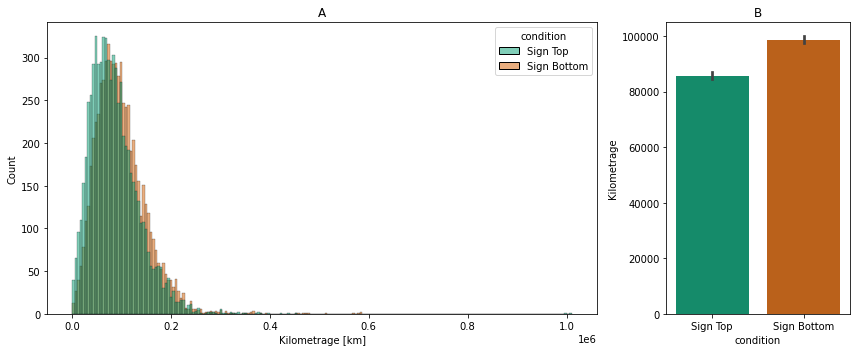

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios': [3, 1]})

# Plot histograms
sns.histplot(x='update_average', hue='condition', data=data[['update_average', 'condition']],  bins=200, ax=ax[0],palette=[COLOR_TOP,COLOR_BOTTOM])
ax[0].set_xlabel('Kilometrage [km]')
ax[0].set_title('A')

# Plot barplot
sns.barplot(x='condition', y='update_average', data = data[['update_average', 'condition']], ax=ax[1], palette=[COLOR_TOP,COLOR_BOTTOM]) 
ax[1].set_ylabel('Kilometrage')
ax[1].set_title('B')

plt.tight_layout()
plt.show()

**Figure 5: Comparison between kilometrages reported on top and at the bottom of the updated contract.**  
**[A]** Histogram of the kilometrages reported on top (green) and at the bottom (orange) of the contract. **[B]** Bar heights indicate the mean of the groups, errorbars indicate the 95% non-parametric confidence interval.

Even though the distributions of the two conditions show overlap, their 95% confidence intervals are well separated. This hints to a significant difference between the two conditions. To further quantify whether or not we can reject the null hypothesis - i.e., the mean values of the two groups are the same - the t-test is suitable.

#### 4.2 Hypothesis testing: is the difference between Sign Top and Sign Bottom significant?

In [ ]:
[t,p] = stats.ttest_ind(data[data['condition'] == 'Sign Top'].update_average, data[data['condition'] == 'Sign Bottom'].update_average)
print('Outcome of the two-sided t-test: p=%.2e.'%p)

Outcome of the two-sided t-test: p=5.44e-47.


The difference is extremely significant (see 4.3 for discussion).

#### 4.3. Discuss: Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty?

Let the null hypothesis $H_0$ be that there is no difference, that is that the (independent) 'sign bottom' and 'sign top' groups have identical expected values of average updated kilometrages per policy.
Then, according to the results of 4.1 and 4.2, the probability of us seeing, under $H_0$, data at least as extreme (i.e. an absolute difference of means at least as big) as the ones we observe in the experiment is around $5\cdot10^{-47}$. This value is significantly below a 0.05 significance level and $H_0$ can hence be rejected with almost absolute certainty. Since the only other difference between the groups that we are aware of at this point is the condition (sign at top vs sign at bottom), **which only concerns the updated kilometers counts of each contract**, we can conclude that, in the assumption that there is no difference in the baseline contracts, it is highly likely that the significantly lower average number of kilometers reported in the **Sign Top** policies is due to **lower honesty of people signing on the top**, suggesting that **signing on the top decreases honesty** and motivates people to be dishonest, contrary to the assumption of the study.

#### 4.4. Discuss: Given that no intervention was performed in the baseline contract (i.e., everyone signed at the bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*  conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.

If the samples were selected truly randomly, **there should be no difference** in the baseline contracts between the conditions as both are i.i.d. samples from the same distribution. As the number of samples increases, according to the *Law of Large Numbers*, the mean of the baseline kilometrages for both types of policy should approach the expected value from the underlying distribution, and in the limit the means should be equal. Since we only dispose of a finite amount of samples, we expect the means to be slightly different, but still comparable under statistical fluctuations.

#### 4.5. Compare the 'sign top' and 'sign bottom' distributions in the baseline contracts

In [ ]:
data.groupby('condition').baseline_average.agg([np.mean, np.std])

,mean,std
condition,,
Sign Bottom,75020.747098,50256.586376
Sign Top,59696.234696,49956.317151


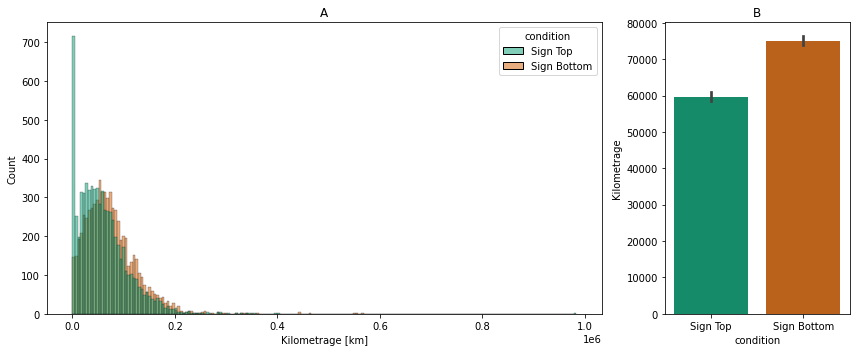

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios': [3, 1]})

# Plot histograms
sns.histplot(x='baseline_average', hue='condition', data=data[['baseline_average', 'condition']],ax=ax[0], palette=[COLOR_TOP,COLOR_BOTTOM])
ax[0].set_xlabel('Kilometrage [km]')
ax[0].set_title('A')

# Plot barplot
sns.barplot(x='condition', y='baseline_average', data = data[['baseline_average', 'condition']],ax=ax[1], palette=[COLOR_TOP,COLOR_BOTTOM])
ax[1].set_ylabel('Kilometrage')
ax[1].set_title('B')

plt.tight_layout()
plt.show()

**Figure 6: Comparison between kilometrages in the baseline contract between the 'Sign Top' and 'Sign Bottom' groups.**  
**[A]** Histograms of the kilometrages in the baseline contract. The group that would later (in the updated contract) become the Sign Top group is shown in green, and the group that would become the Sign Bottom group in orange. **[B]** Bar heights indicate the mean of the kilomatreges in the baseline contract, errorbars indicate the 95% confidence interval.

Again, the two 95% confidence intervals are separated, and we will again test the significance with a t-test.

#### 4.6 Hypothesis testing: is the difference between Sign Top and Sign Bottom significant in the baseline contract?

In [ ]:
[t,p] = stats.ttest_ind(data[data['condition'] == 'Sign Top'].baseline_average, data[data['condition'] == 'Sign Bottom'].baseline_average)
print('Outcome of the two-sided t-test: p=%.2e.'%p)

Outcome of the two-sided t-test: p=9.33e-70.


Again, the difference is very significant and we can reject the null hypothesis that the expected values of average baseline kilometrages per policy are the same for the two groups with almost absolute certainty.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

#### 5.1. Distributions of kilometrages reported for motorcycle 1

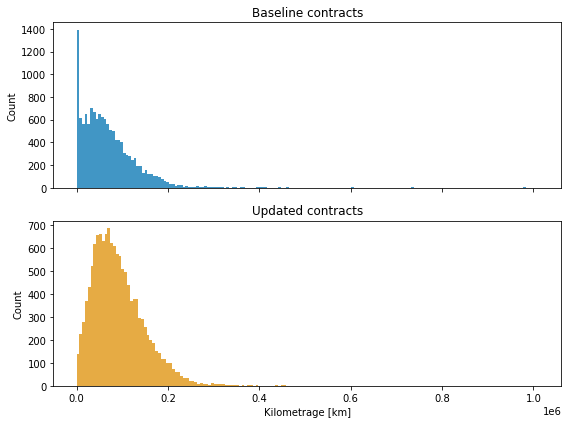

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,6),sharex=True)
sns.histplot(data['baseline_motorcycle1'], ax=ax[0], color=COLOR_BASELINE, edgecolor=None)
ax[0].set_title('Baseline contracts')

sns.histplot(data['update_motorcycle1'], ax=ax[1], color=COLOR_UPDATE, edgecolor=None)
ax[1].set_title('Updated contracts')

plt.xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

**Figure 7: Distributions of ordometer kilometrages reported for motorcycle 1 in the baseline (top) and updated (bottom) contracts.**  
Both distributions are negatively skewed. The distribution of the baseline contract shows a sharp peak at very low kilometrages, which could correspond to almost new motorcycles.

#### 5.2. Distribution of the difference between baseline and updated kilometrages

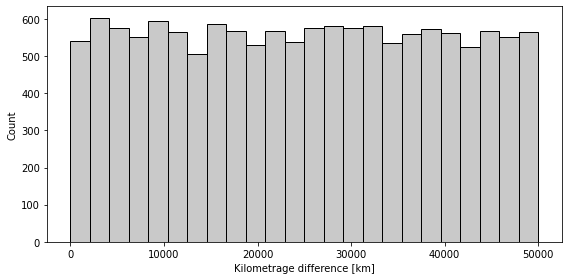

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(data['update_motorcycle1']  - data['baseline_motorcycle1'], color=COLOR_NEUTRAL, ax=ax, alpha=0.5)
ax.set_xlabel('Kilometrage difference [km]')
plt.tight_layout()
plt.show()

**Figure 8: Distribution of the difference in ordometer kilometrage between the baseline and updated contracts reported for motorcycle 1.**  

####  5.3. Discuss: why is this data unlikely to have originated from real odometer readings?

The differences between milleages are almost perfectly uniformly distributed, with a sharp cut-off at 50000 km. If the data were real, we would not expect a uniform distribution nor a cut-off: rather, we would expect a distribution decreasing gradually as we approach the maximum value of kilometers driven, i.e. with a noticeable tail on the right side, reflecting the fact there is only a low probability that someone drives within a year a very large number of kilometers. Furthermore, the cut-off at 50000 km is unlikely since the dataset contains motorcycles with baseline and update values up to $10^6$ kilometers, and we would expect some of them to exhibit larger differences.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline kilometrage of the first motorcycle.
    
---

**Hint:** The last three digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

#### 6.1. Plot the distribution of occurrences of the last three digits

In [ ]:
def get_last_three_digits(number):
    '''
    Returns the last three digits of the int number.
    Example: 12314 returns 314.
    '''
    return int(str(number)[-3:])

In [ ]:
def plot_rectangle(x_min, x_max, y_min, y_max, ax, color='purple', linewidth=2, linestyle='--'):
    '''
    Plot a rectangle on a figure axis.
    The boundaries of the rectangle are defined by x_min, x_max, y_min and y_max.
    '''
    left, bottom, width, height = (x_min, y_min, (x_max-x_min), (y_max-y_min))
    rect = mpatches.Rectangle((left, bottom),width, height, 
                            linestyle = linestyle,
                            fill = False,
                            color = color,
                            linewidth = linewidth)
    ax.add_patch(rect)
    return ax

In [ ]:
def last_digit_plot(dataA, dataB, 
                    labelA, labelB, 
                    colorA, colorB, 
                    x_min=550, x_max=850, y_min=0, y_max=800):
    ''' 
    Draws the distribution of occurrences of the last three digits in kilometrages reported in dataA and dataB, from 000 to 999 and 
    zooming between x_min and x_max.
    '''
    fig,ax = plt.subplots(2,2,figsize=(10,6), sharey='row')

    # Subplot A: whole distribution
    sns.histplot(dataA.apply(get_last_three_digits), bins=30, ax=ax[0,0], color=colorA)

    # Draw a purple rectangle on figure A to clarify the zoomed-in distribution of figure B.
    plot_rectangle(x_min, x_max, y_min, y_max, ax[0,0], color='red')
    ax[0,0].xaxis.label.set_visible(False) # No label
    ax[0,0].yaxis.label.set_visible(False) # No label
    ax[0,0].set_title(labelA)
    ax[0,0].text(0.9, 0.9, 'A', fontsize='large', weight='bold', transform=ax[0,0].transAxes)

    # Subplot C: zoomed-in distribution
    yy_max = 80 # Make rectangle fit the plot
    sns.histplot(dataA.apply(get_last_three_digits), bins=500, edgecolor=None, ax=ax[1,0], color=colorA)
    ax[1,0].set_ylim([y_min, yy_max])
    ax[1,0].set_xlim([x_min, x_max])
    ax[1,0].xaxis.label.set_visible(False) # No label
    ax[1,0].yaxis.label.set_visible(False) # No label
    ax[1,0].text(0.9, 0.9, 'C', fontsize='large', weight='bold', transform=ax[1,0].transAxes)

    # Draw a purple rectangle around figure B.
    plot_rectangle(x_min, x_max, y_min, yy_max, ax[1,0], color='red', linewidth=5)

    # Subplot B: whole distribution and rectangle
    sns.histplot(dataB.apply(get_last_three_digits), bins=30, ax=ax[0,1], color=colorB)
    plot_rectangle(x_min, x_max, y_min, y_max, ax[0,1], color='purple')
    ax[0,1].xaxis.label.set_visible(False) # No label
    ax[0,1].set_title(labelB)
    ax[0,1].text(0.9, 0.9, 'B', fontsize='large', weight='bold', transform=ax[0,1].transAxes)

    # Subplot D: zoomed-in distribution and rectangle
    sns.histplot(dataB.apply(get_last_three_digits), bins=500, edgecolor=None, ax=ax[1,1], color=colorB)
    plot_rectangle(x_min, x_max, y_min, yy_max, ax[1,1], linewidth=5, color='purple')
    ax[1,1].set_ylim([y_min, yy_max])
    ax[1,1].set_xlim([x_min, x_max])
    ax[1,1].xaxis.label.set_visible(False) # No label
    ax[1,1].text(0.9, 0.9, 'D', fontsize='large', weight='bold', transform=ax[1,1].transAxes)

    # Common x and y labels
    fig.supxlabel('Last three digits of reported kilometrage', fontsize=LABEL_FONTSIZE)
    fig.supylabel('Count', fontsize=LABEL_FONTSIZE)

    plt.tight_layout()
    plt.show()

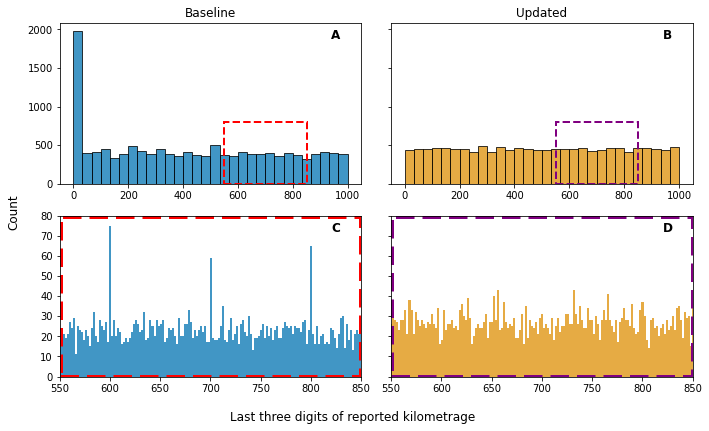

In [ ]:
last_digit_plot(data['baseline_motorcycle1'], data['update_motorcycle1'], 'Baseline', 'Updated', COLOR_BASELINE, COLOR_UPDATE)

**Figure 9: Distribution of occurrences of the last three digits in reported kilometrages.**  
Above, the distribution is shown on the whole axis of possible 3-digit numbers (000 until 999) for **[A]** the baseline and **[B]** the updated contract. Below, zoomed-in distributions with a smaller binsize are shown, again for both the **[C]** baseline and **[D]** updated contract.

#### 6.2. What are the differences between the two distributions?

While the first distribution is heavily skewed towards kilometrages ending with '000', the second one is pretty much perfectly uniform at every scale (except some noise). Increasing the resolution (i.e. number of bins), we can also notice strong spikes within the first distribution on numbers ending with 00, such as 600, 700 or 800.


#### 6.3 – Hypothesize a plausible cause for the patterns observed in the digit distribution of the baseline kilometrage of the first motorcycle.

There are two fundamental hypotheses to explain the observed patterns:
1. People tend to **round the digits** when they input values into the form, e.g approximating 1143 -> 1000 or 702 -> 700. This phenomenon is observed in both approximations to two or to three digits and due to its generality should be expected also in the distribution of updated kilometrages. Its absence in the updated contract kilometrages seems thus very suspicious and reveal another symptome of inconsistencies in the data.
2. Secondly, people are likely to register their motorcycles for the first time **when they buy them**, that is when they have not yet driven any miles at all. In many countries, any motorcycle must be insured by law and hence every new motorcycle is insured immediately, creating a bias for leading zeros.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract  (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

#### 7.1. Load and merge the font data.

In [ ]:
fonts_source = pd.read_csv(DATA_FOLDER + 'fonts.csv', index_col=['id'])
df_fonts = data.merge(fonts_source, how='left', left_index=True, right_index=True, validate='one_to_one')

#### 7.2. Compare Arial and Helvetica distributions

In [ ]:
df_fonts.groupby('font')[['baseline_motorcycle1', 'update_motorcycle1']].count()

,baseline_motorcycle1,update_motorcycle1
font,,
Arial,6744,6744
Helvetica,6742,6742


There are two more datapoints reported in Arial than in Helvetica.

In [ ]:
# Utility
fonts_list = ['Arial', 'Helvetica']
color_list = [COLOR_ARIAL, COLOR_HELVETICA]
columns_list = ['baseline_motorcycle1', 'update_motorcycle1']
label_letters = ['A', 'B', 'C', 'D']

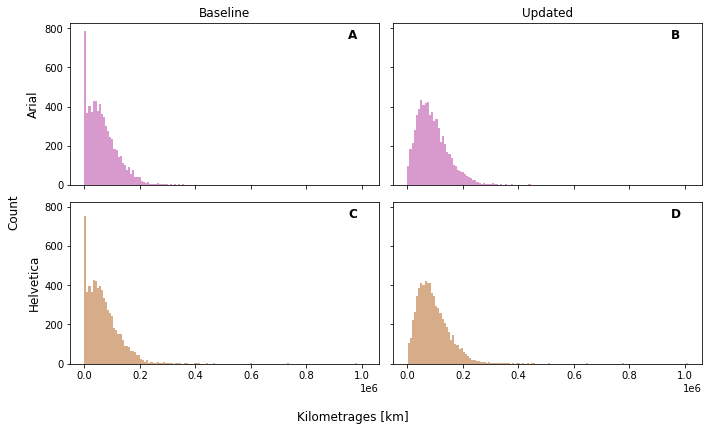

In [ ]:
# Plot distributions of kilometrages
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 6))
count = 0

for y in range(2):
    color = color_list[y]
    for x in range(2):
        sns.histplot(df_fonts[df_fonts.font == fonts_list[y]][columns_list[x]], ax=ax[y,x], edgecolor=None, color=color)
        ax[y,x].text(0.9, 0.9, label_letters[count], fontsize='large', weight='bold', transform=ax[y,x].transAxes)
        ax[y,x].set_xlabel('')
        count += 1

ax[0,0].set_title('Baseline')
ax[0,0].set_ylabel('Arial',fontsize=LABEL_FONTSIZE)
ax[0,1].set_title('Updated')
ax[1,0].set_ylabel('Helvetica',fontsize=LABEL_FONTSIZE)

# Common x and y labels
fig.supxlabel('Kilometrages [km]', fontsize=LABEL_FONTSIZE)
fig.supylabel('Count', fontsize=LABEL_FONTSIZE)

fig.tight_layout()
fig.show()

**Figure 10: Comparison between kilometrages reported in Arial (top) and in Helvetica (bottow).**  
**[A]** Baseline contracts in Arial, **[B]** Updated contracts in Arial, **[C]** Baseline contracts in Helvetica, **[D]** Updated contracts in Helvetica.

The Arial and Helvetica distributions look extremely similar, both for baseline (A and C) and updated (B and D) contracts. We can see this even clearer in the QQ plot below.

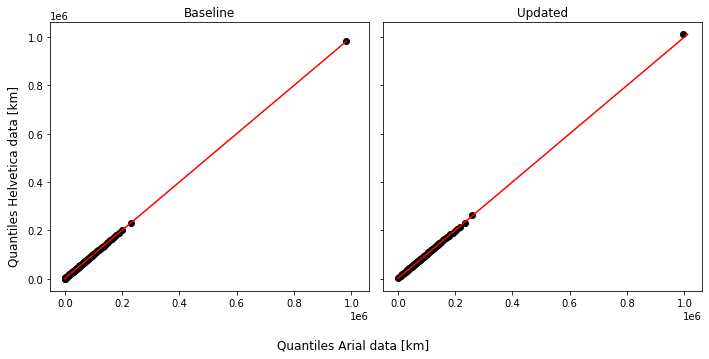

In [ ]:
# Store min and max of data as variables
min_data_baseline,max_data_baseline = df_fonts.baseline_motorcycle1.min(), df_fonts.baseline_motorcycle1.max()
min_data_updated,max_data_updated = df_fonts.update_motorcycle1.min(), df_fonts.update_motorcycle1.max()

# Make 100 quantiles
q = np.linspace(0, 100, 101) 

# Make QQ plots
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 5))

ax[0].scatter(np.percentile(df_fonts.baseline_motorcycle1[df_fonts.font == 'Arial'], q), np.percentile(df_fonts.baseline_motorcycle1[df_fonts.font == 'Helvetica'], q), color='k')
ax[0].plot([min_data_baseline,max_data_baseline],[min_data_baseline,max_data_baseline], 'r') # plot y=x

ax[1].scatter(np.percentile(df_fonts.update_motorcycle1[df_fonts.font == 'Arial'], q), np.percentile(df_fonts.update_motorcycle1[df_fonts.font == 'Helvetica'], q), color='k')
ax[1].plot([min_data_updated,max_data_updated],[min_data_updated,max_data_updated], 'r') # plot y=x

ax[0].set_title('Baseline')
ax[1].set_title('Updated')
# Common x and y labels
fig.supxlabel('Quantiles Arial data [km]', fontsize=LABEL_FONTSIZE)
fig.supylabel('Quantiles Helvetica data [km]', fontsize=LABEL_FONTSIZE)

plt.tight_layout()
plt.show()

**Figure 11: Arial vs Helvetica quantiles, for baseline and updated contracts.**  
Comparing the quantiles is evident again that the two sets of data follow almost perfectly the same distribution.

#### 7.3. Distribution of last 3 reported digits.

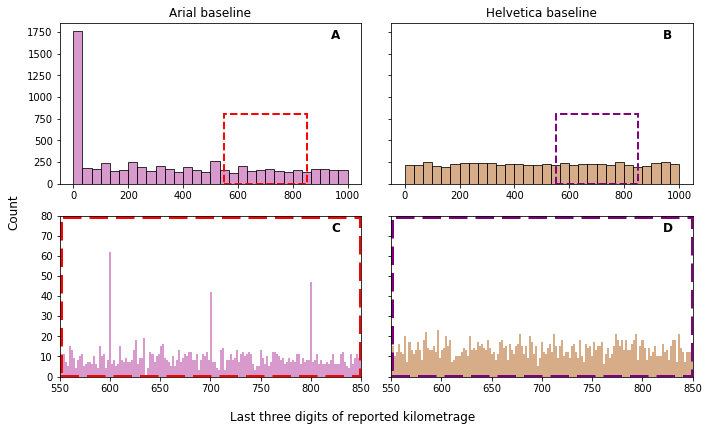

In [ ]:
last_digit_plot(df_fonts[df_fonts.font == 'Arial']['baseline_motorcycle1'], 
                df_fonts[df_fonts.font == 'Helvetica']['baseline_motorcycle1'], 
                'Arial baseline', 'Helvetica baseline',COLOR_ARIAL, COLOR_HELVETICA)

**Figure 12: Comparison between last 3 reported digits in Arial (left) and in Helvetica (right) baseline.**  
Above, the distribution is shown on the whole axis of possible 3-digit numbers (000 until 999) for the baseline contracts of Arial **[A]**  and Helvetica **[B]**. Below, zoomed-in distributions with a smaller binsize are shown, again for both the Arial **[C]** and Helvetica **[D]** baseline contracts.

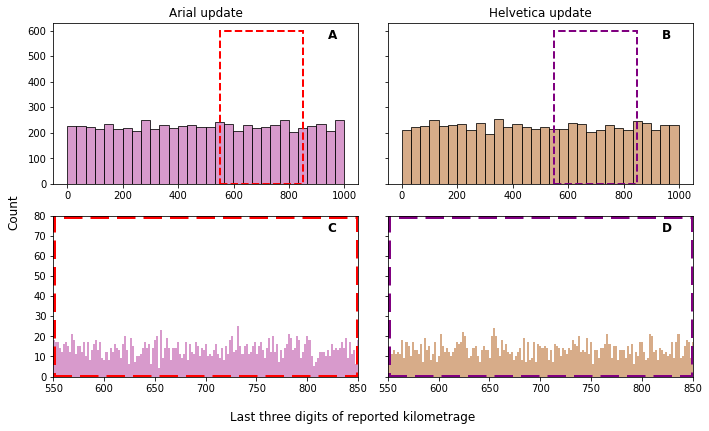

In [ ]:
last_digit_plot(df_fonts[df_fonts.font == 'Arial']['update_motorcycle1'], 
                df_fonts[df_fonts.font == 'Helvetica']['update_motorcycle1'], 
                'Arial update', 'Helvetica update', y_max=600,colorA=COLOR_ARIAL, colorB=COLOR_HELVETICA)

**Figure 13: Comparison between last 3 reported digits in Arial (left) and in Helvetica (right) updated.**  
Above, the distribution is shown on the whole axis of possible 3-digit numbers (000 until 999) for the updated contracts of Arial **[A]**  and Helvetica **[B]**. Below, zoomed-in distributions with a smaller binsize are shown, again for both the Arial **[C]** and Helvetica **[D]** updated contracts.

Only the baseline contract reported in Arial is more biased towards kilometrages ending with '000' and '00', while the other three distributions are not. This gives us the impression that the baseline contracts reported in Arial are the only real data, reported by humans. 

#### 7.4. Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

If baseline kilometrages written in Helvetica font were not tampered, then we would expect a similar distribution with respect of those written in Arial font, as the samples would come from the same distribution and would be i.i.d. However, we can observe in the case of Arial baseline contracts a lot of contracts with a kilometer count ending with 000 or 00, but **we don't see anything similar in the Helvetica ones.** These peaks are expected since people tend to round digits when they input data, and **their absence in Helvetica baseline contracts is a strong symptom of unwise fabrication.** However, the fact that these peaks don't appear in either font in the updated contracts **also arouses suspicions for the updated Arial data.**

We also observe that these two datasets have almost the same size, and follow almost perfectly the same distribution. This again is suspicious, since in real word if fonts were randomly assigned to samples we would have at least some random noise leading to a more pronounced difference in distributions. As before, this evidence suggests that data have been unwisely tampered.

Hence, we can conclude that **the Helvetica font data were likely fabricated**.

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

#### 8. Email to PI
Dear Principal Investigator,  

-  We have serious reasons to believe that the data provided by the Motorcycle Company is fraudulent. Our suspicion is based on the following analyses of motors reported as '*motorcycle 1*':

1. A statistically significant difference between the ‘Sign Top’ and ‘Sign Bottom’ groups was found for both the updated and the baseline contracts, even though no randomized experiment was conducted with baseline contracts.
2. The difference between the updated and the baseline kilometrages follows almost perfectly a uniform distribution with a sharp cut-off at 50000km (**Fig. 8**), suggesting that the updated values are artificially generated by adding random numbers to the baseline values.
3. The data consists of two different fonts. While the baseline data reported in Arial confirms people's natural tendency to round kilometrages to the nearest hundred, all the other data contain no such pattern (**Fig. 9, 12**), suggesting they were generated by a computer.

- Based on these findings, we hypothesise the data has fabricated in the following ways:
1. Only the **baseline contracts reported in Arial are real** ordometer values reported by customers.
2. The number of datapoints was **doubled**, possibly by drawing random kilometrages from the same distribution as the baseline Arial contracts (e.g., using a kernel density estimate). The fabricated datapoints were noted down in Helvetica instead of Arial.  
3. The updated contracts were fabricated by **adding uniformly distributed random numbers** to the baseline contracts.
4. Possibly, the 'Sign Top' and 'Sign Bottom' groups were assigned in a **non-random fashion** to intentionally create a significant difference between the groups. 

- In conclusion, we have reasons to believe that 75% of the dataset is fabricated , and that the experiment was not randomized. Therefore, **no conclusion can be reached from this data**. To reach a conclusion, we need to repeat the experiment and gather reliable data.

Yours sincerely,  
Team ALAN

# Supplementary/experimental

In [ ]:
# idea: arial data is real because it shows the edxpected artifact of a lot of 0's, while helvetica data has been tampered with
# idea2: part7 is for surprisingly many points, perhaps they want us to do more

In [ ]:
data_arial = df_fonts[df_fonts['font'] == 'Arial']
data_helvetica = df_fonts[df_fonts['font'] == 'Helvetica']
print(len(data_arial), len(data_helvetica))

6744 6742


NameError: name 'PALETTE' is not defined

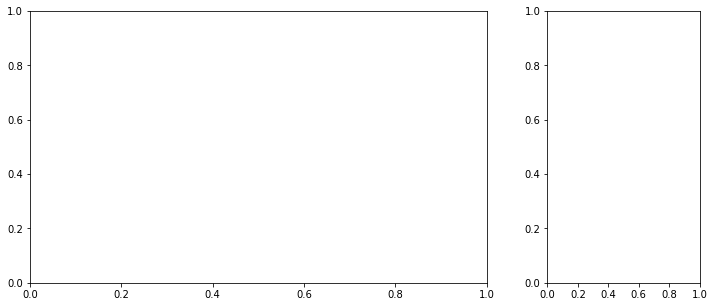

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios': [3, 1]})

# Plot histograms
sns.histplot(x='update_average', hue='condition', data=data_arial[['update_average', 'condition']],ax=ax[0], palette=PALETTE)
ax[0].set_xlabel('Kilometrage [km]')
ax[0].set_title('A')

# Plot barplot
sns.barplot(x='condition', y='update_average', data = data_arial[['update_average', 'condition']],ax=ax[1], palette=PALETTE)
ax[1].set_ylabel('Kilometrage')
ax[1].set_title('B')

plt.tight_layout()
plt.show()

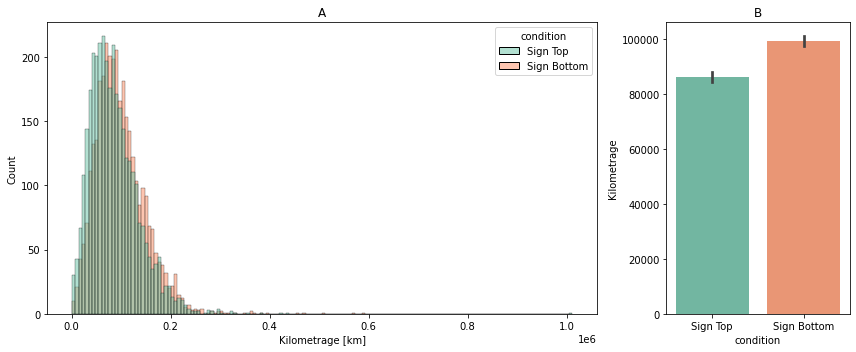

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios': [3, 1]})

# Plot histograms
sns.histplot(x='update_average', hue='condition', data=data_helvetica[['update_average', 'condition']],ax=ax[0], palette=PALETTE)
ax[0].set_xlabel('Kilometrage [km]')
ax[0].set_title('A')

# Plot barplot
sns.barplot(x='condition', y='update_average', data = data_helvetica[['update_average', 'condition']],ax=ax[1], palette=PALETTE)
ax[1].set_ylabel('Kilometrage')
ax[1].set_title('B')

plt.tight_layout()
plt.show()

In [ ]:
# Question: did the falsified data come from Helvetica and is that why we have 2 datapoints less? Maybe someone messed up while tampering!

In [ ]:
df_fonts_outliers = data_raw.merge(fonts_source, how='left',left_index=True,right_index=True, validate='one_to_one')

In [ ]:
data_arial_outliers = df_fonts_outliers[df_fonts_outliers['font'] == 'Arial']
data_helvetica_outliers = df_fonts_outliers[df_fonts_outliers['font'] == 'Helvetica']
print(len(data_arial_outliers), len(data_helvetica_outliers))

6744 6743


In [ ]:
print(len(fonts_source) - 6744) # Hmm weird what is this one data point that is not matched
print(len(df_fonts_outliers) - 6744) # We throw away 11 rows – 2 outliers and 9 duplicates.
#Ok my tampering hypo with outliers probably can't be proven

6743
6753


In [ ]:
data_helvetica.groupby('condition').baseline_average.agg([np.mean, np.std])

,mean,std
condition,,
Sign Bottom,75449.540531,50350.711436
Sign Top,59731.937971,49798.181502


In [ ]:
data_arial.groupby('condition').baseline_average.agg([np.mean, np.std])

,mean,std
condition,,
Sign Bottom,74590.018677,50165.743311
Sign Top,59660.708894,50120.428270


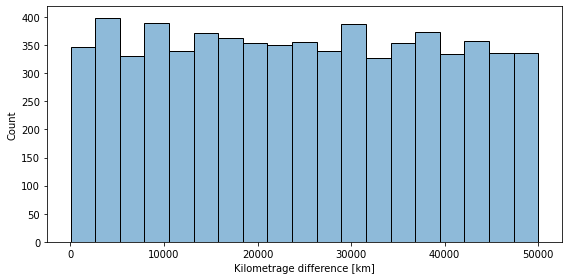

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(data_arial['update_motorcycle1']  - data_arial['baseline_motorcycle1'], palette=PALETTE, ax=ax, alpha=0.5)
ax.set_xlabel('Kilometrage difference [km]')
plt.tight_layout()
plt.show()

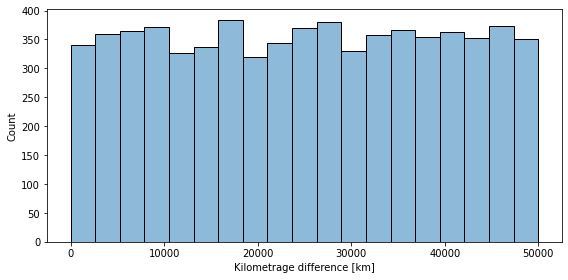

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(data_helvetica['update_motorcycle1']  - data_helvetica['baseline_motorcycle1'], palette=PALETTE, ax=ax, alpha=0.5)
ax.set_xlabel('Kilometrage difference [km]')
plt.tight_layout()
plt.show()

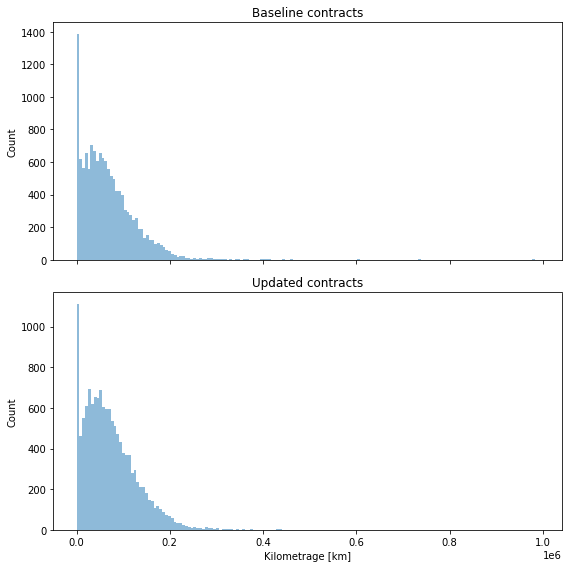

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)
sns.histplot(data['baseline_motorcycle1'], palette=PALETTE, ax=ax[0], edgecolor=None, alpha=0.5)
ax[0].set_title('Baseline contracts')


x = data['update_motorcycle1'].apply(lambda x: max(0, x-20000))
sns.histplot(x, palette=PALETTE, ax=ax[1], edgecolor=None, alpha=0.5)
ax[1].set_title('Updated contracts')

plt.xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

In [ ]:
x.describe()

count     13486.000000
mean      72719.383064
std       57955.255172
min           0.000000
25%       30092.000000
50%       62382.000000
75%      103303.250000
max      990893.000000
Name: update_motorcycle1, dtype: float64

<AxesSubplot:xlabel='baseline_motorcycle1', ylabel='Count'>

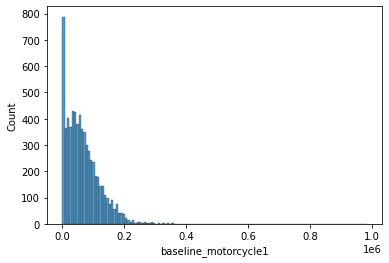

In [ ]:
df_fonts.baseline_motorcycle1[df_fonts.font=='Arial'].sort_values()
sns.histplot(df_fonts.baseline_motorcycle1[df_fonts.font=='Arial'])

<AxesSubplot:xlabel='baseline_motorcycle1', ylabel='Count'>

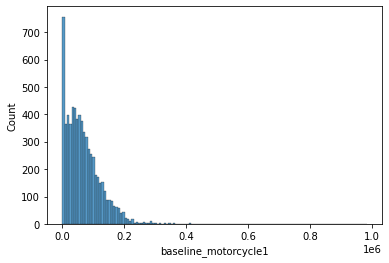

In [ ]:
df_fonts.baseline_motorcycle1[df_fonts.font=='Helvetica'].sort_values()
sns.histplot(df_fonts.baseline_motorcycle1[df_fonts.font=='Helvetica'])

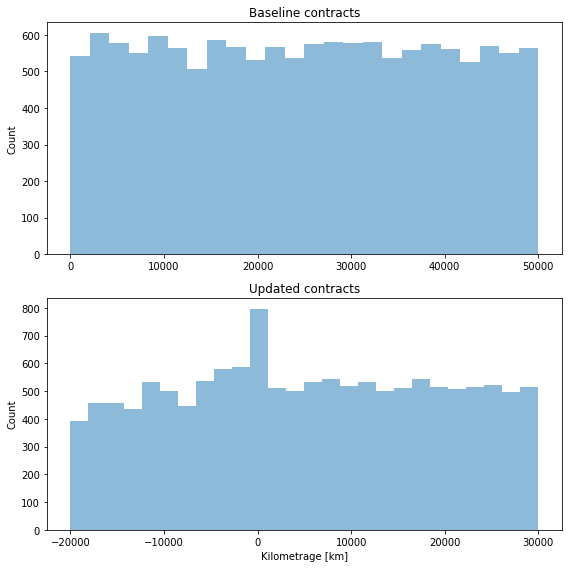

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=False)
sns.histplot(data['update_motorcycle1']  - data['baseline_motorcycle1'], palette=PALETTE, ax=ax[0], edgecolor=None, alpha=0.5)
ax[0].set_title('Baseline contracts')
sub = x - data['baseline_motorcycle1']
sns.histplot(sub, palette=PALETTE, ax=ax[1], edgecolor=None, alpha=0.5)
ax[1].set_title('Updated contracts')
plt.xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

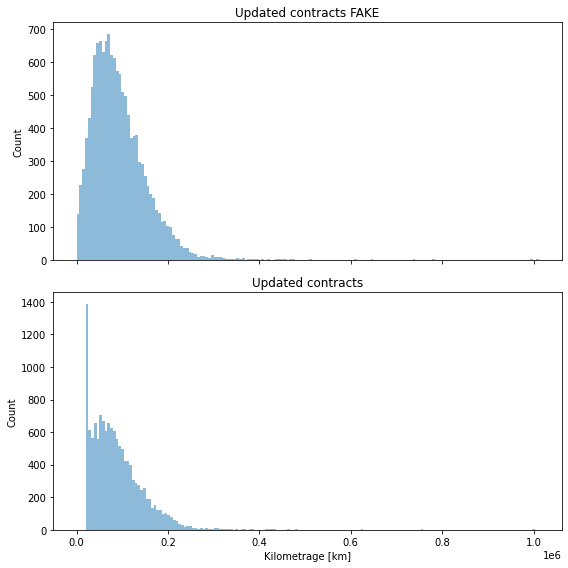

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)
sns.histplot(data['update_motorcycle1'], palette=PALETTE, ax=ax[0], edgecolor=None, alpha=0.5)
ax[1].set_title('Updated contracts')

fake_y = data['baseline_motorcycle1'].apply(lambda x: x+20000)
sns.histplot(fake_y, palette=PALETTE, ax=ax[1], edgecolor=None, alpha=0.5)
ax[0].set_title('Updated contracts FAKE')


plt.xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

In [ ]:
data_arial.groupby('condition').count()

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
condition,,,,,,,,,,,,,
Sign Bottom,3324,3324,1399,1399,318,318,81,81,3324,3324,3324,3324,3324
Sign Top,3420,3420,1426,1426,321,321,82,82,3420,3420,3420,3420,3420


In [ ]:
data_helvetica.groupby('condition').count()

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
condition,,,,,,,,,,,,,
Sign Bottom,3339,3339,1391,1391,325,325,85,85,3339,3339,3339,3339,3339
Sign Top,3403,3403,1431,1431,313,313,78,78,3403,3403,3403,3403,3403


In [ ]:
data.describe()

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
count,13486.000000,1.348600e+04,5.647000e+03,5.647000e+03,1277.000000,1277.000000,326.000000,326.000000,13486.000000,13486.000000,1.348600e+04,13486.000000
mean,67345.119457,9.227501e+04,6.732687e+04,9.227642e+04,67657.320282,92849.408771,67827.975460,93374.279141,1.537595,67267.584699,9.216698e+04,24899.395392
std,56734.860279,5.855348e+04,6.023176e+04,6.188910e+04,64419.001860,66547.920222,54610.217241,56345.386070,0.614160,50685.506907,5.221286e+04,12495.931401
min,0.000000,4.200000e+01,0.000000e+00,1.160000e+02,0.000000,155.000000,0.000000,622.000000,1.000000,0.000000,1.250000e+02,24.000000
25%,25277.750000,5.009200e+04,2.449650e+04,4.988050e+04,18500.000000,43872.000000,14284.750000,41525.500000,1.000000,31090.375000,5.591988e+04,15525.250000
50%,56341.500000,8.238200e+04,5.615700e+04,8.205600e+04,58821.000000,85645.000000,68181.000000,93387.500000,1.000000,59717.500000,8.464600e+04,24939.333333
75%,96254.500000,1.233032e+05,9.700000e+04,1.221970e+05,100000.000000,128037.000000,106882.000000,128940.500000,2.000000,92238.250000,1.190441e+05,34416.750000
max,983155.000000,1.010893e+06,1.000581e+06,1.030915e+06,884594.000000,931105.000000,217715.000000,244658.000000,4.000000,983155.000000,1.010893e+06,49997.000000


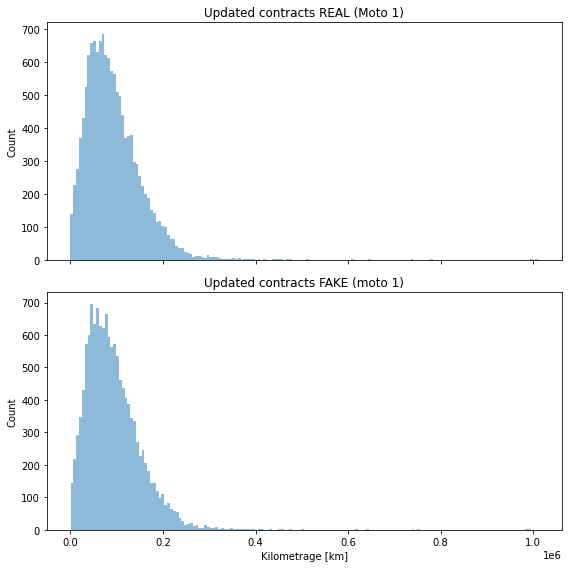

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)
sns.histplot(data['update_motorcycle1'], palette=PALETTE, ax=ax[0], edgecolor=None, alpha=0.5)
ax[0].set_title('Updated contracts REAL (Moto 1)')

unif_addition = np.random.rand(*data['baseline_motorcycle1'].shape)*50000

fake_y = data['baseline_motorcycle1'] + unif_addition
sns.histplot(fake_y, palette=PALETTE, ax=ax[1], edgecolor=None, alpha=0.5)
ax[1].set_title('Updated contracts FAKE (moto 1)')


# fake_y = data['baseline_motorcycle1'] + unif_addition
# sns.histplot(fake_y, palette=PALETTE, ax=ax[2], edgecolor=None, alpha=0.5)
# ax[2].set_title('Updated contracts FAKE (moto 1)')




plt.xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

In [ ]:
bot = df_fonts[df_fonts['font']=='Arial'][df_fonts['condition']=='Sign Bottom']['baseline_motorcycle1']
top = df_fonts[df_fonts['font']=='Arial'][df_fonts['condition']=='Sign Top']['baseline_motorcycle1']
stats.kstest(top, bot)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


KstestResult(statistic=0.13275064918614224, pvalue=2.271618856545773e-26)

In [ ]:
stats.kstest(data_arial[data_arial['condition']=='Sign Top']['baseline_motorcycle1'], data_arial[data_arial['condition']=='Sign Bottom']['baseline_motorcycle1'])

KstestResult(statistic=0.13275064918614224, pvalue=2.271618856545773e-26)

In [ ]:
stats.kstest(fake_y, data['update_motorcycle1'])

KstestResult(statistic=0.005487171881951691, pvalue=0.9865810101919755)

In [ ]:
data['update_motorcycle1'] - fake_y

id
1        31618.702904
2        -4262.107525
3       -31159.214831
4         -934.173511
5        36660.661392
             ...     
13484     6071.357910
13485   -15296.442538
13486   -34848.573264
13487      708.600810
13488     7840.353836
Length: 13486, dtype: float64

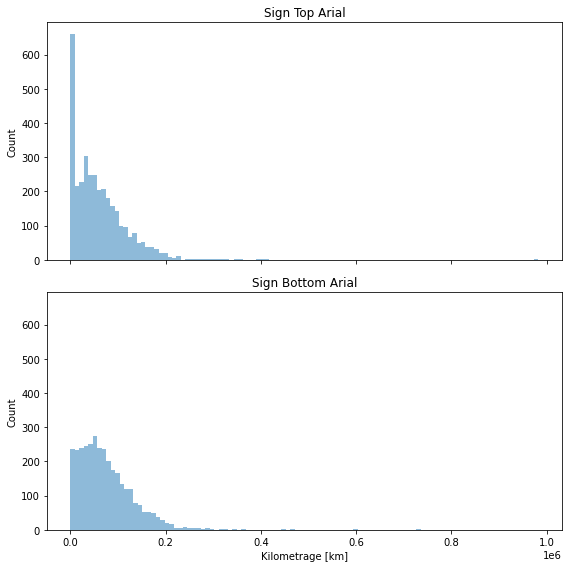

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True, sharey=True)
sns.histplot((data_arial[data_arial.condition == 'Sign Top'])['baseline_motorcycle1'], palette=PALETTE, ax=ax[0], edgecolor=None, alpha=0.5)
ax[0].set_title('Sign Top Arial')


sns.histplot((data_arial[data_arial.condition == 'Sign Bottom'])['baseline_motorcycle1'], palette=PALETTE, ax=ax[1], edgecolor=None, alpha=0.5)
ax[1].set_title('Sign Bottom Arial')

#ax[0].set_xlim((10**(4.5), 1e6))

# fake_y = data['baseline_motorcycle1'] + unif_addition
# sns.histplot(fake_y, palette=PALETTE, ax=ax[2], edgecolor=None, alpha=0.5) 
# ax[2].set_title('Updated contracts FAKE (moto 1)')




plt.xlabel('Kilometrage [km]')
plt.tight_layout()
plt.show()

In [ ]:
# mean_diff = sb_arial.mean() - st_arial.mean()

# fig,ax = plt.subplots(2,1, sharex=True)
# sns.histplot(sb_arial, palette=PALETTE, ax=ax[0], edgecolor=None, alpha=0.5)
# ax[0].set_title('Sign bottom arial')

# unif_addition = np.random.rand(*st_arial.shape)*2*mean_diff
# fake_y = st_arial + unif_addition
# sns.histplot(fake_y, palette=PALETTE, ax=ax[1], edgecolor=None, alpha=0.5)
# ax[1].set_title('FAKE sign bottom arial')

# stats.kstest(fake_y, sb_arial)

Text(0.5, 1.0, 'Arial top - bottom')

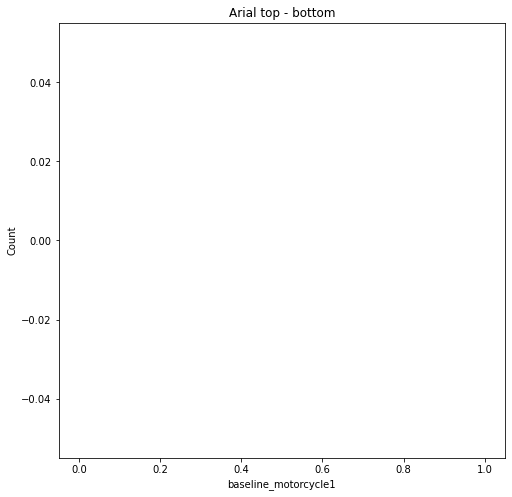

In [ ]:
st_arial = (data_arial[data_arial.condition == 'Sign Top'])['baseline_motorcycle1']
sb_arial = (data_arial[data_arial.condition == 'Sign Bottom'])['baseline_motorcycle1']
diff = st_arial - sb_arial

fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.histplot(diff, palette=PALETTE, ax=ax, edgecolor=None, alpha=0.5)
ax.set_title('Arial top - bottom')

Text(0.5, 1.0, 'Arial top - bottom')

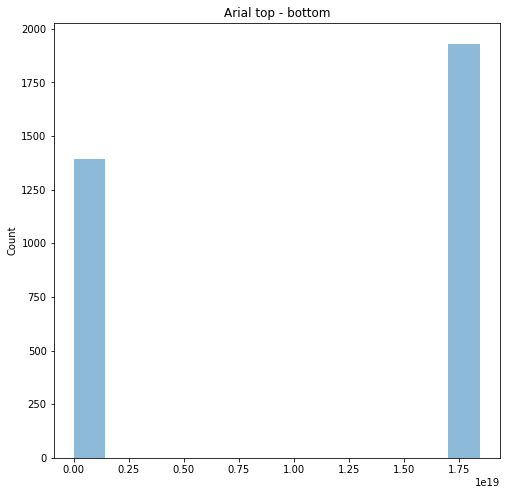

In [ ]:
a = st_arial.values[:3324]
a.sort
aa = sb_arial.values[:3324]
aa.sort()
diff = a-aa

fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.histplot(diff, palette=PALETTE, ax=ax, edgecolor=None, alpha=0.5)
ax.set_title('Arial top - bottom')

In [ ]:
df_fonts.groupby(by=['condition','font']).count()['baseline_motorcycle1']

condition    font     
Sign Bottom  Arial        3324
             Helvetica    3339
Sign Top     Arial        3420
             Helvetica    3403
Name: baseline_motorcycle1, dtype: int64

<AxesSubplot:ylabel='Count'>

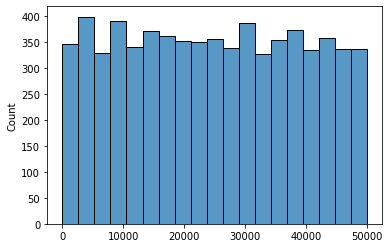

In [ ]:
arial_b = df_fonts[df_fonts.font == 'Arial']['baseline_motorcycle1']
arial_u = df_fonts[df_fonts.font == 'Arial']['update_motorcycle1']
diff = arial_u.astype(np.int) - arial_b.astype(np.int)
sns.histplot(diff)

67105.86402728352
91843.93119810201


<AxesSubplot:xlabel='update_motorcycle1', ylabel='Count'>

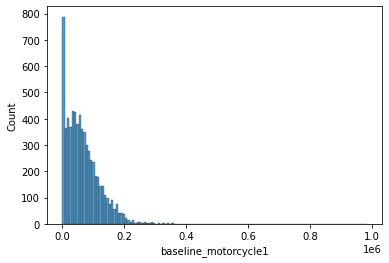

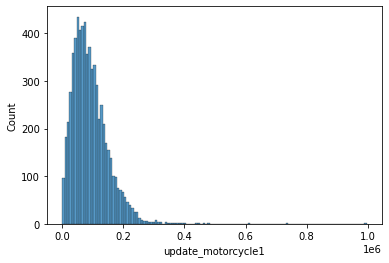

In [ ]:
print(arial_b.mean())
print(arial_u.mean())
plt.figure()
sns.histplot(arial_b)
plt.figure()
sns.histplot(arial_u)


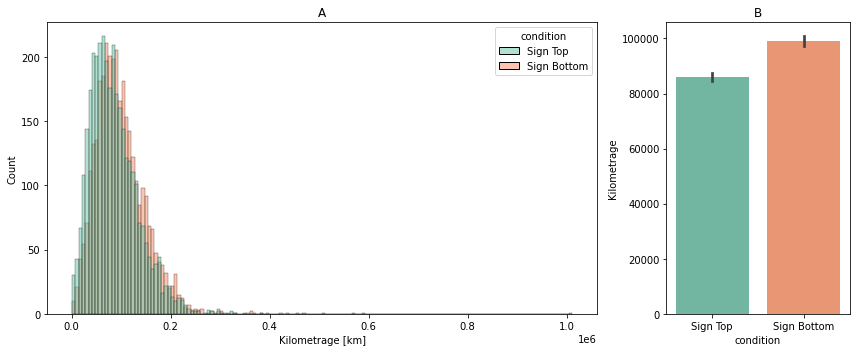

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios': [3, 1]})

# Plot histograms
sns.histplot(x='update_average', hue='condition', data=data_helvetica[['update_average', 'condition']],ax=ax[0], palette=PALETTE)
ax[0].set_xlabel('Kilometrage [km]')
ax[0].set_title('A')

# Plot barplot
sns.barplot(x='condition', y='update_average', data = data_helvetica[['update_average', 'condition']],ax=ax[1], palette=PALETTE)
ax[1].set_ylabel('Kilometrage')
ax[1].set_title('B')

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4745606a-24b3-450d-a9a2-0dcbca13975f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>